# CMPINF 2100: Midterm exam

## Vedant Kansara

### Assigned: Monday October 18, 2021

### DUE: Sunday October 24, 2021 at 11:00PM EST

You may add as many code and markdown cells as you see fit to answer the questions.

### You are NOT allowed to collaborate with anyone on this exam.

### Overview

You will demonstrate your ability to merge, group, summarize, visualize, and find patterns in data. This exam makes use of a an example similar to extra presentation from Week 01, which demonstrated the importance of contextulization. The data are representative of manufacturing data associated with the production of cell phone cases. Those cases are produced from "batches" of plastic provided by multiplier Suppliers. The "batch" is represented by the Density of the plastic shipped to the phone case maker. The cell phone cases are created on individual machines (an injection molding press). A single batch can be used across several machines. Each machine can be operated differently to try and produce the best possible phone case. The operation is summarized by 4 variables referred to as "operational variables". The cell phone cases are tested before shipping to customers. Cases are randomly sampled from each batch per machine. A drop test is performed to determine if the cell phone case breaks or not. You will go through a short contextualization process of merging multiple data sets, in order to explore and find interesting patterns between the machine operating conditions and supplier information. You will report your findings within this notebook via displaying Pandas DataFrames and statistical visualizations via Seaborn.  

### Data descriptions

You will work with 5 data sets. Their contents are described here to help you with possible groupings to consider.

#### Machine data sets

Three of the data sets are associated with the operation of 3 separate machines in a manufacturing process. Each of the "machine data sets" consist of 5 variables: `ID`, `Batch`, `s_id`, `x1`, `x2`, `x3`, and `x4`. The `ID` is the identification string associated with an individual cell phone case. The `Batch` variable is an identification number for batches of supplied plastic material the cell phone cases were produced from. The `s_id` variable corresponds to the sequential production order the cell phone cases were produced in per `Batch` on a specific machine. Lastly, the four variables, `x1` through `x4`, are four operational variables representing how the machine was operated. One row in each of the three machine data sets corresponds to a single cell phone case manufactured on a specific machine within a particular `Batch`.  

#### Supplier batch data set

Each batch of plastic material is associated with the supplier than provided it in the supplier batch data set. One row corresponds to a single batch. The supplier batch data set contains three variables: `Batch`, `Supplier`, and `Density`. The `Batch` is an identification number of the batch. The `Supplier` variable is the name of the supplier of the material for that specific `Batch` value. Lastly, `Density`, describes the batch of plastic material.

#### Test data set

A subset of cell phone cases per batch per machine is randomly collected for destructive testing. The randomly selected cases are dropped from a height to see if the case with break or not. One row in the testing data set consists of a single cell phone case. It contains three variables: `ID` is the identification string associated with an individual cell phone case, `test_group_id` corresponds to an identification string for a group of tests associated with a batch per machine, and lastly `Result` is a string (object type) with the test result.

## Import modules

You are permitted to use the following modules on this exam.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

You may also use the following functions from scikit-learn on this exam.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

You are **NOT** permitted to use any other modules or functions. However, you **ARE** permitted to create your own custom functions if you would like.

## Problem 01

The download URL's for each of the 3 machine data sets are provided in the cell below. You are required to read in the CSV files and assign the data to the `m01_df`, `m02_df`, and `m03_df` objects. The data from machine 1 will therefore be associated with `m01_df`, machine 2 is associated with `m02_df`, and machine 3 is associated with `m03_df`.  

In this problem you must explore each of the machine data sets. To receive full credit you must answer the following:  

* How many rows are in each data set? Are there missing values?
* How many unique values for `Batch` are associated with each data set?
* How many cell phone cases (rows) are associated with each `Batch` value per machine?
* Summarize the operating variables `x1` through `x4` for each data set.
    * Do the summary statistics vary across the three machines?
    * Do the summary statistics vary across the batches?
* Visualize the relationships between the operating variables.
    * Do the relationships change across machines?
    * Do the relationships change across batches?
* You must concatenate the 3 data sets together into a single long format DataFrame.
    
When summarizing the operating variables, create boxplot figures where the `x` axis variable corresponds to the `Batch` and the `y` axis variable corresponds to the operating variable. You may use as many figures as you feel are appropriate to describe the behavior in the data sets. 

Include markdown cells stating what you see in the figures and why you selected to use them.

You may add as many markdown and code cells as you see fit to answer this question. However, you **must** concatenate the three machine data sets, `m01_df`, `m02_df`, and `m03_df` into a single DataFrame `machine_df`. Before concatenating, you should add a column `machine_id` to each DataFrame with the correct index value for that machine (1, 2, or 3). The concatenating DataFrame variable name is provided as a reminder to you below. 

In [3]:
# Define the URL's for the 3 machine level CSV files

url_m01 = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/midterm/midterm_machine_01.csv'

url_m02 = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/midterm/midterm_machine_02.csv'

url_m03 = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/midterm/midterm_machine_03.csv'

In [4]:
# read in the CSV files and name them accordingly

m01_df = pd.read_csv(url_m01)

m02_df = pd.read_csv(url_m02)

m03_df = pd.read_csv(url_m03)

### Concatenating the 3 data frames

In [5]:
m01_df['machine_id'] = pd.Series( '1', index=m01_df.index )

In [6]:
m01_df = m01_df[["machine_id","ID","Batch","s_id","x1","x2","x3","x4"]]

In [7]:
m02_df['machine_id'] = pd.Series( '2', index=m02_df.index )

In [8]:
m02_df = m02_df[["machine_id","ID","Batch","s_id","x1","x2","x3","x4"]]

In [9]:
m03_df['machine_id'] = pd.Series( '3', index=m03_df.index )

In [10]:
m03_df = m03_df[["machine_id","ID","Batch","s_id","x1","x2","x3","x4"]]

In [11]:
machine_df = pd.concat([m01_df, m02_df, m03_df], axis = 0)

In [12]:
machine_df = machine_df.reset_index()

In [13]:
# concatenate the 3 DataFrames into a single DataFrame which includes the `machine_id` variable

machine_df = pd.concat([m01_df, m02_df, m03_df], axis = 0)

### Calculating the number of rows in each data frame

In [14]:
m01_df.shape

(5152, 8)

In [15]:
m02_df.shape

(5119, 8)

In [16]:
m03_df.shape

(4458, 8)

In [17]:
machine_df.shape

(14729, 8)

### Checking if there are any missing values in each data frame

In [18]:
m01_df.isna().sum()

machine_id    0
ID            0
Batch         0
s_id          0
x1            0
x2            0
x3            0
x4            0
dtype: int64

In [19]:
m02_df.isna().sum()

machine_id    0
ID            0
Batch         0
s_id          0
x1            0
x2            0
x3            0
x4            0
dtype: int64

In [20]:
m03_df.isna().sum()

machine_id    0
ID            0
Batch         0
s_id          0
x1            0
x2            0
x3            0
x4            0
dtype: int64

In [21]:
machine_df.isna().sum()

machine_id    0
ID            0
Batch         0
s_id          0
x1            0
x2            0
x3            0
x4            0
dtype: int64

There are no missing values in any of the data frame 

### Calcluating the unique values of `Batch` associated with each data frame

In [22]:
m01_df.Batch.nunique()

50

In [23]:
m02_df.Batch.nunique()

50

In [24]:
m03_df.Batch.nunique()

41

### Calculating the number of cell phone (rows) cases associated with each `Batch` value per machine

In [25]:
m01_df.Batch.value_counts()

36    149
40    148
33    140
12    135
29    134
2     131
22    128
27    127
34    127
41    125
37    122
7     121
46    119
13    119
44    114
48    112
45    112
8     111
10    111
50    109
19    109
47    107
43    106
42    106
9     105
6     103
11    101
32    101
5     100
3     100
30     99
17     99
25     98
20     97
21     97
16     93
18     93
49     91
39     89
14     81
35     76
28     75
31     73
26     72
15     71
1      70
4      68
38     67
23     58
24     53
Name: Batch, dtype: int64

In [26]:
m02_df.Batch.value_counts()

43    133
27    130
45    120
5     120
2     119
21    119
29    119
41    117
49    117
42    117
8     116
46    115
20    114
25    114
34    114
36    110
18    110
48    108
23    107
37    107
44    107
10    107
40    106
19    105
12    105
11    104
1     102
6     101
32    100
33    100
3      99
7      98
22     97
39     97
38     96
50     96
16     96
30     95
28     93
9      91
47     89
13     88
14     83
35     82
31     82
4      81
26     81
24     76
15     72
17     64
Name: Batch, dtype: int64

In [27]:
m03_df.Batch.value_counts()

5     141
21    141
12    140
43    133
19    127
32    127
37    127
33    127
42    122
34    121
41    120
2     120
9     119
29    117
48    115
46    115
26    113
22    112
45    112
40    111
13    110
36    110
27    109
38    108
31    106
6     106
49    104
24    103
3     103
44    102
4     102
20    100
17    100
16     94
14     94
1      85
23     84
35     77
15     76
28     72
47     53
Name: Batch, dtype: int64

### Summarinzing operating variables

In [28]:
m01_df.dtypes

machine_id     object
ID             object
Batch           int64
s_id            int64
x1            float64
x2            float64
x3            float64
x4            float64
dtype: object

In [29]:
m01_df.describe()

,Batch,s_id,x1,x2,x3,x4
count,5152.000000,5152.000000,5152.000000,5152.000000,5152.000000,5152.000000
mean,26.047748,54.540373,51.998218,102.207011,23.947216,10.628436
std,14.560368,33.650665,3.151912,12.888171,2.269325,1.542291
min,1.000000,1.000000,44.275379,65.810729,19.095832,7.644190
25%,13.000000,26.000000,49.335776,96.610288,22.334048,9.479969
50%,27.000000,52.000000,52.536206,104.487824,23.855690,10.356002
75%,39.000000,80.000000,54.662490,110.609442,25.448356,11.318120
max,50.000000,149.000000,58.647186,130.228828,29.477213,14.612911


In [30]:
m02_df.describe()

,Batch,s_id,x1,x2,x3,x4
count,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000
mean,25.929674,52.754444,51.989377,101.998905,23.982312,10.605275
std,14.595274,31.263876,3.095129,12.834348,2.275809,1.523140
min,1.000000,1.000000,44.896759,64.774007,19.232164,7.934064
25%,13.000000,26.000000,49.240567,96.325502,22.372944,9.492226
50%,26.000000,52.000000,52.610949,104.357308,23.894465,10.329911
75%,39.000000,78.000000,54.785418,110.672960,25.546656,11.286062
max,50.000000,133.000000,58.503441,131.009046,29.093229,14.400437


In [31]:
m03_df.describe()

,Batch,s_id,x1,x2,x3,x4
count,4458.00000,4458.000000,4458.000000,4458.000000,4458.000000,4458.000000
mean,26.24428,56.475774,51.857672,101.650057,23.927679,10.602371
std,14.28990,33.827427,3.022646,12.243012,2.035196,1.554708
min,1.00000,1.000000,45.690397,70.192150,19.865338,8.155668
25%,14.00000,28.000000,49.228020,95.381831,22.457249,9.475467
50%,27.00000,55.000000,52.598712,104.712727,23.900193,10.351781
75%,38.00000,83.000000,54.810528,110.050211,25.142293,11.301126
max,49.00000,141.000000,56.981029,126.332105,28.972747,14.182623


From the above talbes we can observe that even though there are slight difference the values of mean, std, and other paramerters the values of operating valrables does not change a lot across 3 machines

In [32]:
cmp_var = machine_df.select_dtypes('float64').copy()

In [33]:
cmp_var['Batch'] = machine_df.Batch

In [34]:
cmp_var['machine_id'] = machine_df.machine_id

In [35]:
cmp_var = cmp_var.reset_index().drop(columns=['index'])

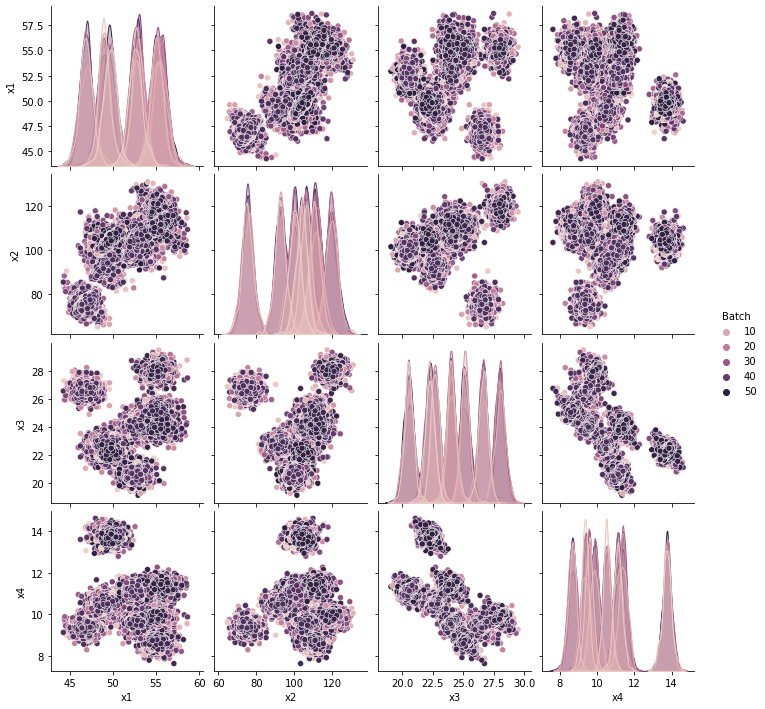

In [36]:
sns.pairplot(data = cmp_var, hue='Batch', diag_kws={'common_norm': False})

plt.show()

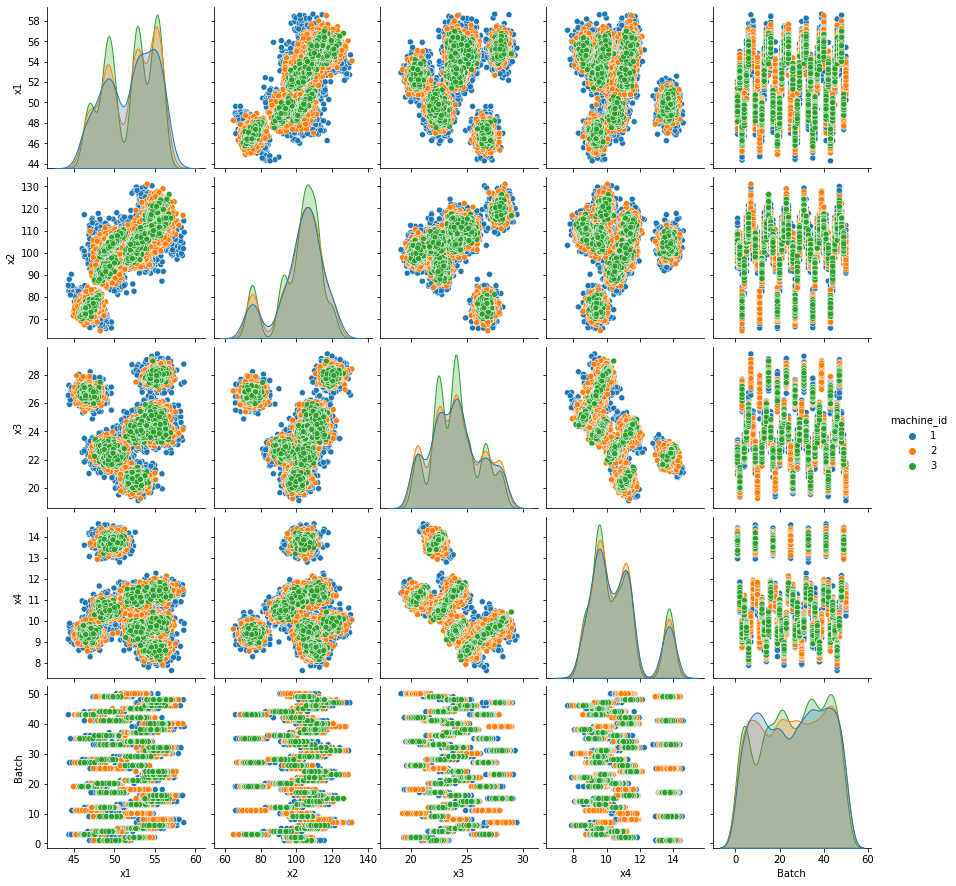

In [37]:
sns.pairplot(data = cmp_var, hue='machine_id', diag_kws={'common_norm': False})

plt.show()

## Problem 02

The supplier batch data set download URL is provided for you below. You must read in the CSV file and assign the data set to the `batch_df` object. To receive full credit you must answer the following:  

* How many rows are in each data set? Are there missing values?
* How many unique values for `Supplier` are there?
* Summarize the `Density` for each unique value of `Supplier`.
* You must merge the `batch_df` DataFrame with the `machine_df` DataFrame.
* Create visualizations to summarize the operating variables.
    * Use boxplots to summarize the operating variables for each `Batch` value, per machine, per Supplier.
* Create visualizations to describe the relationship between the operating variables.
    * "Break up" those visualizations based on the `Supplier`.

You may add as many markdown and code cells as you see fit to answer this question. However, you **must** merge `machine_df` with `batch_df` and assign the result to the `dfa` DataFrame. A cell below provides the `dfa` variable as a reminder.

In [38]:
# define the batch supplier URL
batch_url = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/midterm/midterm_supplier.csv'

In [39]:
# read in the batch supplier data set

batch_df = pd.read_csv(batch_url)

In [40]:
# merge the batch supplier data set with the (concatenated) machine data set

dfa = pd.merge(machine_df, batch_df, on = ['Batch'], how = 'left')

In [41]:
dfa.head()

,machine_id,ID,Batch,s_id,x1,x2,x3,x4,Supplier,Density
0,1,B001-M01-S001,1,1,50.117118,102.167346,22.067812,13.889524,B,10.388587
1,1,B001-M01-S002,1,2,46.887333,112.266102,23.197330,13.064709,B,10.388587
2,1,B001-M01-S003,1,3,50.132744,103.674908,22.319933,13.647482,B,10.388587
3,1,B001-M01-S004,1,4,48.501042,107.143156,22.162947,14.077758,B,10.388587
4,1,B001-M01-S005,1,5,49.690442,102.120283,22.248696,13.728666,B,10.388587


### Calculating number of rows in each data set 

In [42]:
batch_df.shape

(50, 3)

In [43]:
dfa.shape

(14729, 10)

### Checking if there are any missing values

In [44]:
batch_df.isna().sum()

Batch       0
Supplier    0
Density     0
dtype: int64

In [45]:
dfa.isna().sum()

machine_id    0
ID            0
Batch         0
s_id          0
x1            0
x2            0
x3            0
x4            0
Supplier      0
Density       0
dtype: int64

There are no missing values in both data frame

### Calculating number of unique supplier

In [46]:
batch_df.Supplier.nunique()

2

In [47]:
batch_df.Supplier.unique()

array(['B', 'A'], dtype=object)

In [48]:
batch_df.Supplier.value_counts()

A    30
B    20
Name: Supplier, dtype: int64

There are only 2 unique suppliers and they are A and B

### Summarizing `Density` for each unique value of `Supplier`

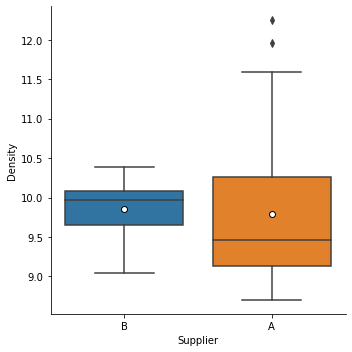

In [49]:
sns.catplot(data = batch_df, x='Supplier', y='Density', kind='box',
           showmeans=True, meanprops={'marker': 'o', 'markerfacecolor':'white', 'markeredgecolor':'black'})

plt.show()

Create visualizations to summarize the operating variables

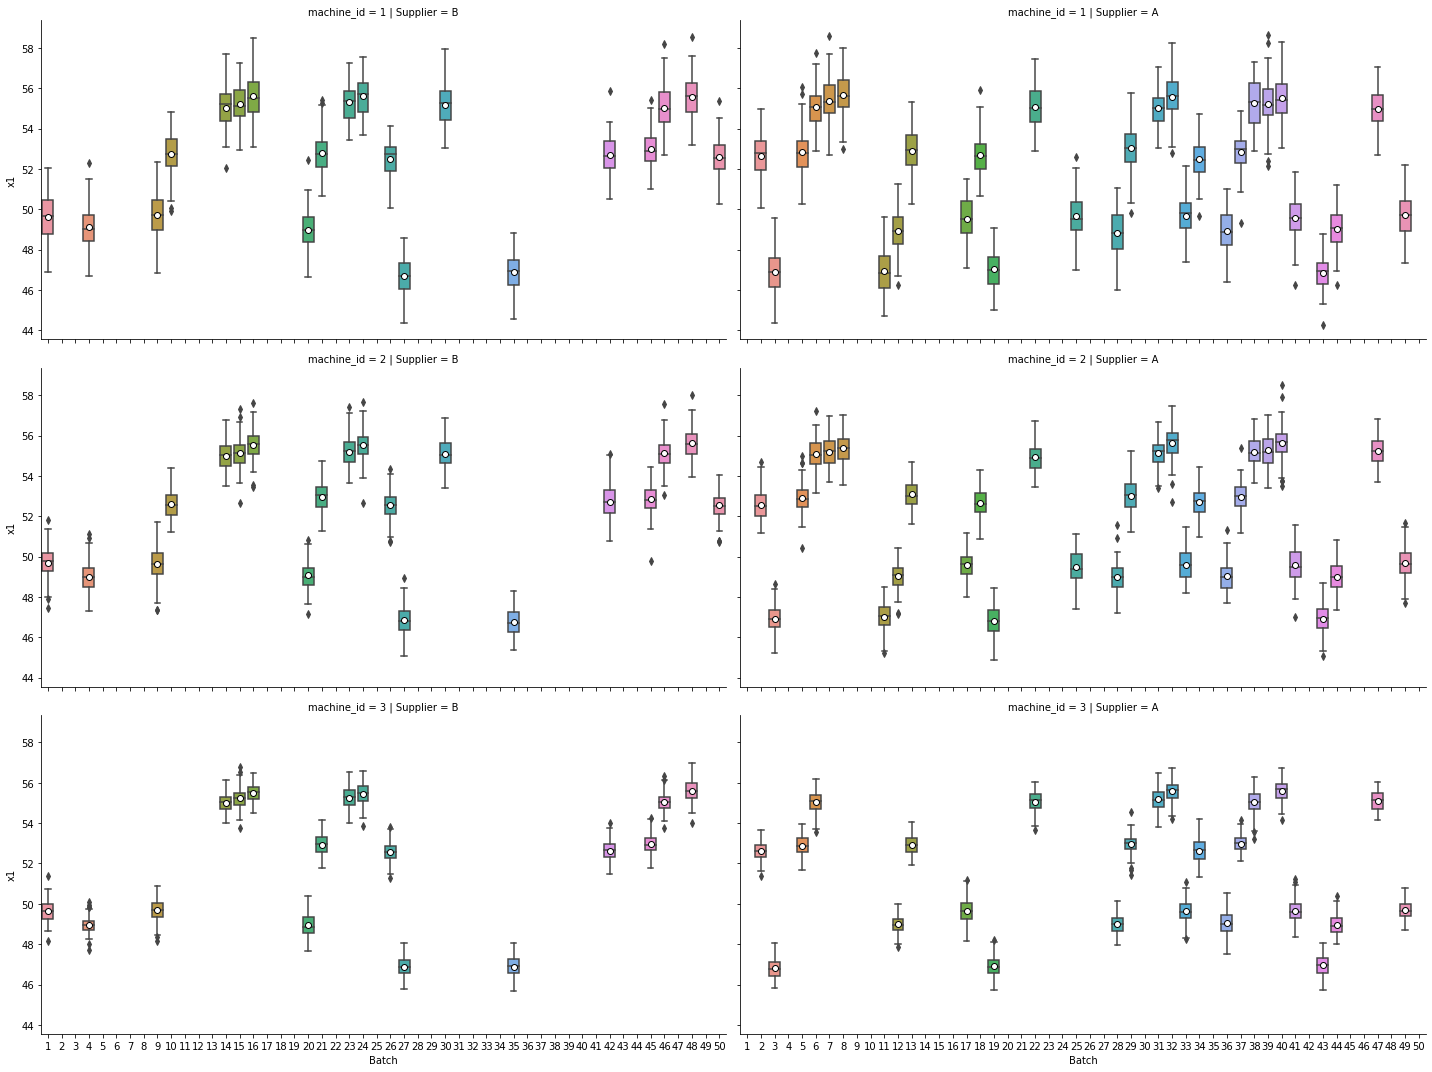

In [50]:
sns.catplot(data = dfa, x='Batch', y='x1', row = 'machine_id', col = 'Supplier',kind='box', aspect =2,
           showmeans=True, meanprops={'marker': 'o', 'markerfacecolor':'white', 'markeredgecolor':'black'})

plt.show()

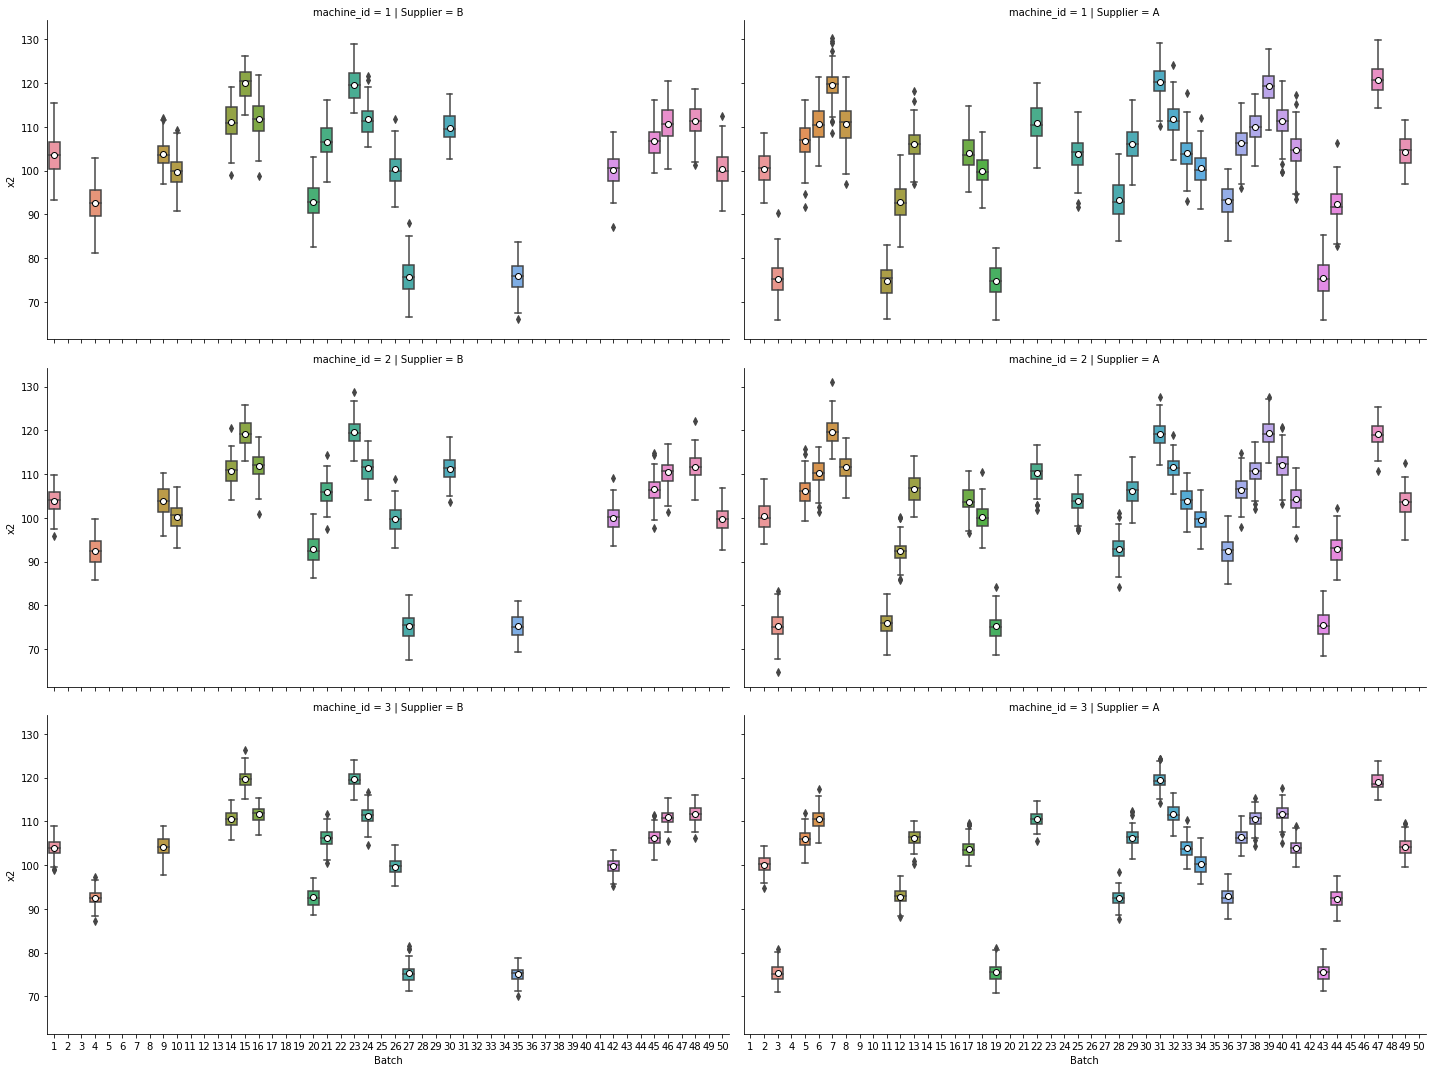

In [51]:
sns.catplot(data = dfa, x='Batch', y='x2', row = 'machine_id', col = 'Supplier',kind='box', aspect =2,
           showmeans=True, meanprops={'marker': 'o', 'markerfacecolor':'white', 'markeredgecolor':'black'})

plt.show()

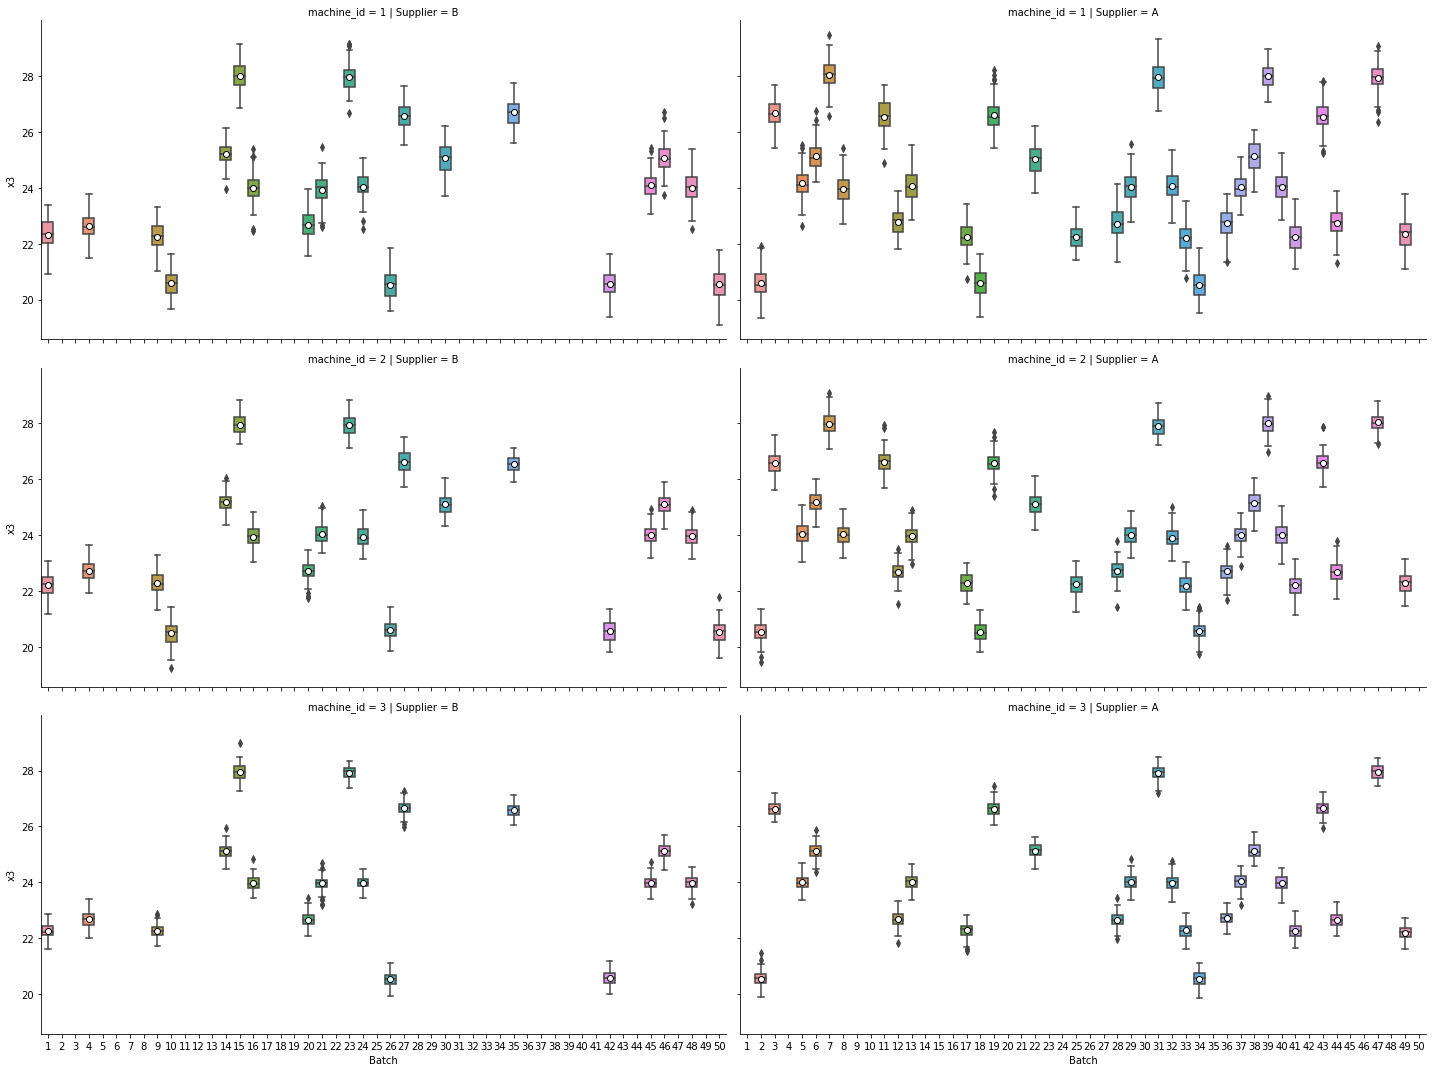

In [52]:
sns.catplot(data = dfa, x='Batch', y='x3', row = 'machine_id', col = 'Supplier',kind='box', aspect =2,
           showmeans=True, meanprops={'marker': 'o', 'markerfacecolor':'white', 'markeredgecolor':'black'})

plt.show()

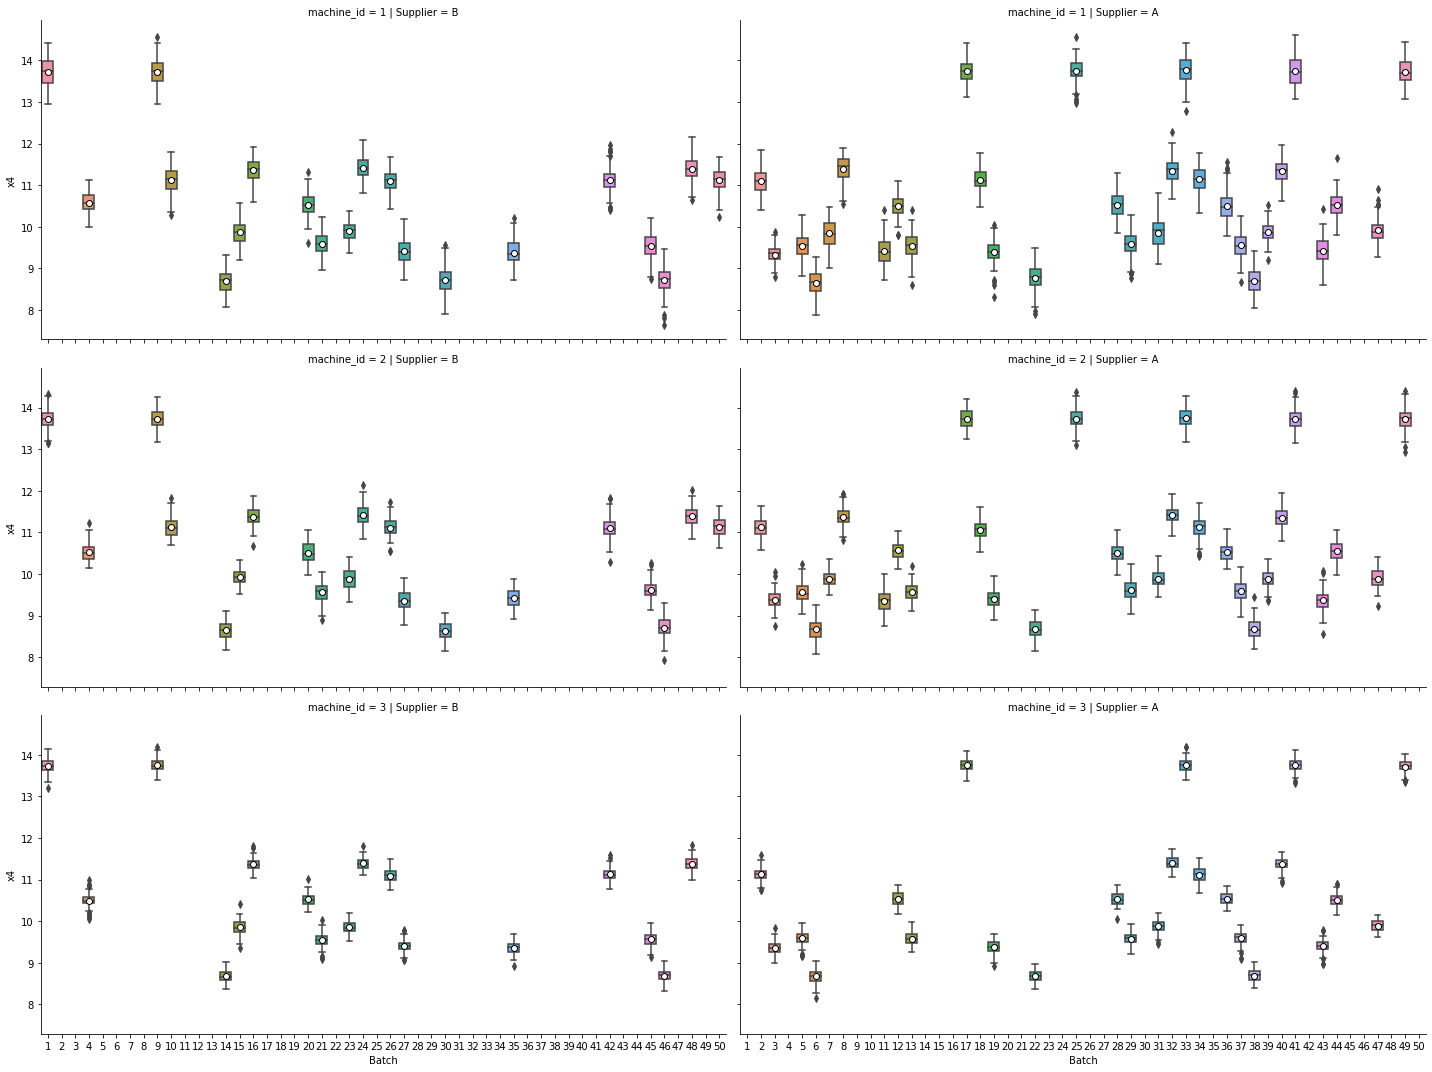

In [53]:
sns.catplot(data = dfa, x='Batch', y='x4', row = 'machine_id', col = 'Supplier',kind='box', aspect =2,
           showmeans=True, meanprops={'marker': 'o', 'markerfacecolor':'white', 'markeredgecolor':'black'})

plt.show()

Create visualizations to describe the relationship between the operating variables

In [54]:
new = dfa.select_dtypes('float64').copy()

In [55]:
new = new.drop(columns = ['Density'])

In [56]:
new['Supplier'] = dfa.Supplier

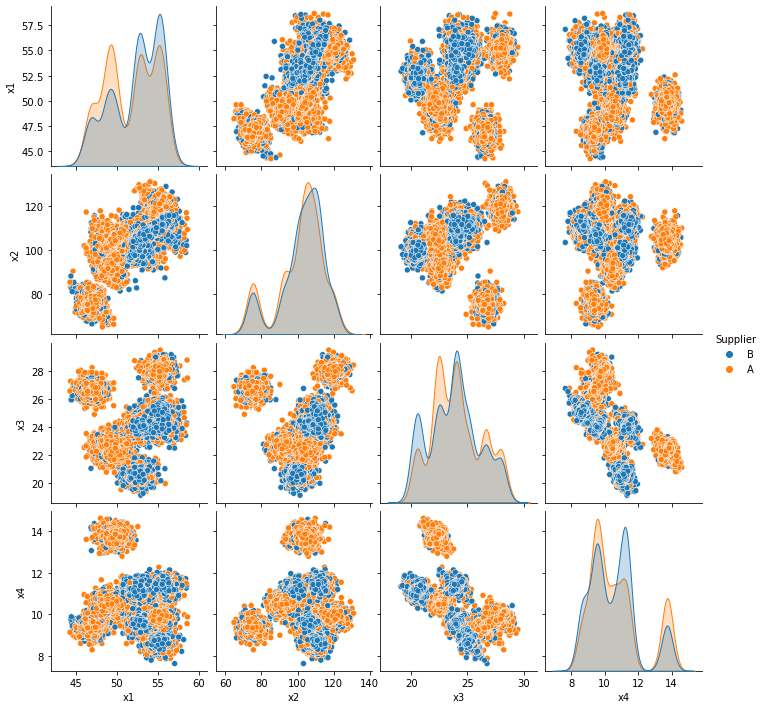

In [57]:
sns.pairplot(data = new, hue='Supplier', diag_kws={'common_norm': False})

plt.show()

## Problem 03

The destructive test result data set download URL is provided for you below. You must read in the CSV file and assign the dta set to the `test_df` object. To receive full credit you must answer the following:

* How many rows are in the data set? Are there missing values?
* How many unique values for `test_group_id` are there?
* How many unique values for `Result` are there? 
* Count the number of times each unique value of `Result` occurs for each `test_group_id` value.
* Merge the `test_df` data set with the `dfa` data set. How many rows remain using the default joining procedure?
    * Assign the merged data set to the `dfb` object.

You may add as many markdown and code cells as you see fit to answer this question. However, you **must** merge `test_df` with `dfa` and assign the result to the `dfa` DataFrame. A cell below provides the `dfb` variable as a reminder.

In [58]:
# define the test data set URL
test_url = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/midterm/midterm_test.csv'

In [59]:
# read in the test data set

test_df = pd.read_csv(test_url)

### Merging `test_df` and `dfa`

In [60]:
# merge test_df with the dfa object

dfb = pd.merge(dfa, test_df, on = ['ID'], how = 'inner')

In [61]:
dfb.head()

,machine_id,ID,Batch,s_id,x1,x2,x3,x4,Supplier,Density,test_group_id,Result
0,1,B001-M01-S002,1,2,46.887333,112.266102,23.197330,13.064709,B,10.388587,A-0,Fail
1,1,B001-M01-S024,1,24,51.531574,100.207219,22.281345,13.796810,B,10.388587,A-0,Fail
2,1,B001-M01-S030,1,30,48.306819,109.445722,22.910858,13.839830,B,10.388587,A-0,Pass
3,1,B001-M01-S038,1,38,52.058573,93.272568,21.937216,13.332882,B,10.388587,A-0,Fail
4,1,B001-M01-S048,1,48,50.564504,109.184587,22.083064,13.954942,B,10.388587,A-0,Fail


In [62]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1411
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   machine_id     1412 non-null   object 
 1   ID             1412 non-null   object 
 2   Batch          1412 non-null   int64  
 3   s_id           1412 non-null   int64  
 4   x1             1412 non-null   float64
 5   x2             1412 non-null   float64
 6   x3             1412 non-null   float64
 7   x4             1412 non-null   float64
 8   Supplier       1412 non-null   object 
 9   Density        1412 non-null   float64
 10  test_group_id  1412 non-null   object 
 11  Result         1412 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 143.4+ KB


In [63]:
dfb["machine_id"] = dfb["machine_id"].astype(int)

In [64]:
dfb.shape

(1412, 12)

So only 1412 row remains in dfb dataset.

### Calculating number of rows and NA in test data set

In [65]:
test_df.shape

(1412, 3)

In [66]:
test_df.isna().sum()

ID               0
test_group_id    0
Result           0
dtype: int64

In [67]:
test_df.head()

,ID,test_group_id,Result
0,B001-M01-S056,A-0,Fail
1,B001-M01-S002,A-0,Fail
2,B001-M01-S049,A-0,Fail
3,B001-M01-S030,A-0,Pass
4,B001-M01-S048,A-0,Fail


### Calculating number of unique values `test_group_id`

In [68]:
test_df.test_group_id.nunique()

141

### Calculating number of unique values `Result`

In [69]:
test_df.Result.nunique()

2

* Count the number of times each unique value of `Result` occurs for each `test_group_id` value.


In [70]:
test_df.Result.value_counts()

Pass    986
Fail    426
Name: Result, dtype: int64

In [71]:
test_df.test_group_id[test_df.Result == 'Pass'].value_counts()

L-4    14
G-0    12
J-1    12
X-3    12
N-1    12
       ..
Y-0     2
Q-2     2
C-5     1
V-4     1
A-0     1
Name: test_group_id, Length: 126, dtype: int64

In [72]:
test_df.test_group_id[test_df.Result == 'Fail'].value_counts()

G-1    14
O-1    12
M-3    11
C-5    11
V-4    11
       ..
R-3     1
Q-3     1
D-3     1
N-3     1
D-1     1
Name: test_group_id, Length: 107, dtype: int64

## Problem 04

You must now examine the merged `dfb` object and answer the following:

* Count the number of times each unique value of `Result` occurs for each value of `machine_id`.
* Count the number of times each unique value of `Result` occurs for each value of `Supplier`.
* Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id`.
* Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id` and `Supplier`.
* Calculate the fraction of times the cell phone case failed the test in each `Batch` per `machine_id`.
* Visualize the fraction of times the cell phone case failed the test in each `Batch` per `machine_id` and for each unique value of `Supplier`.

##### Counting the number of times each unique value of `Result` occurs for each value of `machine_id`.

In [73]:
dfb.Result.value_counts()

Pass    986
Fail    426
Name: Result, dtype: int64

In [74]:
dfb.machine_id[dfb.Result == 'Pass'].value_counts()

2    342
1    333
3    311
Name: machine_id, dtype: int64

In [75]:
dfb.machine_id[dfb.Result == 'Fail'].value_counts()

1    159
2    147
3    120
Name: machine_id, dtype: int64

##### Count the number of times each unique value of `Result` occurs for each value of `Supplier`.

In [76]:
dfb.Supplier[dfb.Result == 'Pass'].value_counts()

A    588
B    398
Name: Supplier, dtype: int64

In [77]:
dfb.Supplier[dfb.Result == 'Fail'].value_counts()

A    290
B    136
Name: Supplier, dtype: int64

##### Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id`.

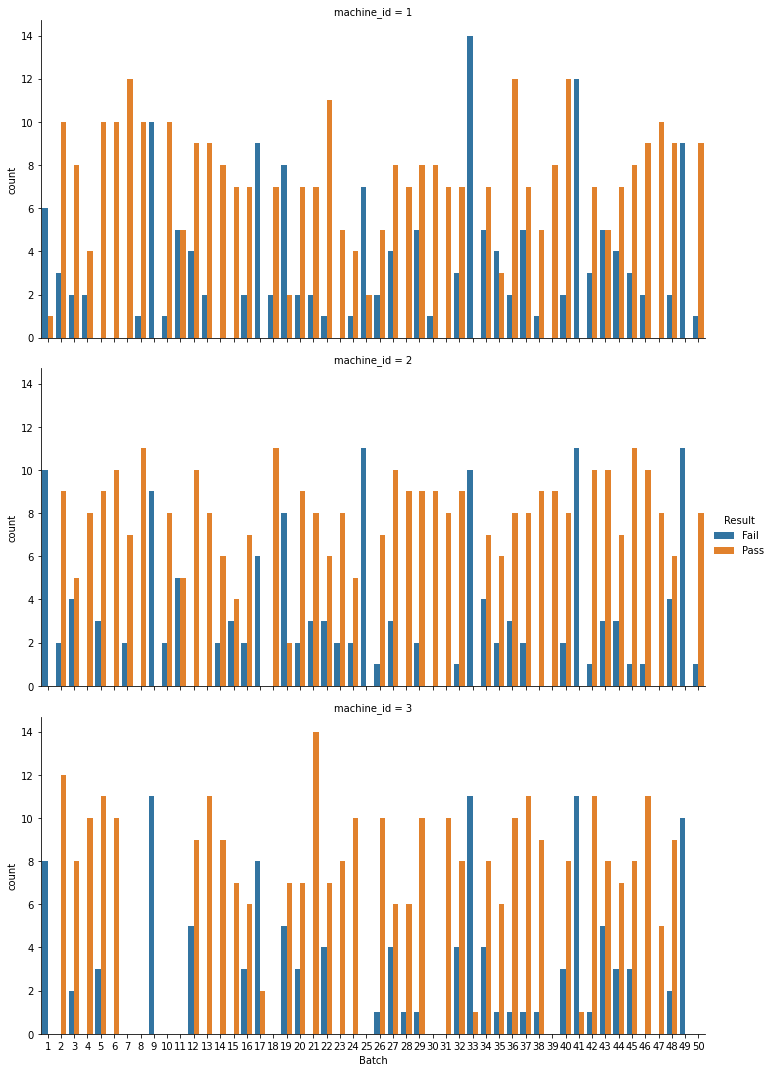

In [78]:
sns.catplot(data = dfb, x = 'Batch', hue='Result', col='machine_id', kind ='count', aspect=2,col_wrap=1)

plt.show()

##### Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id` and `Supplier`.

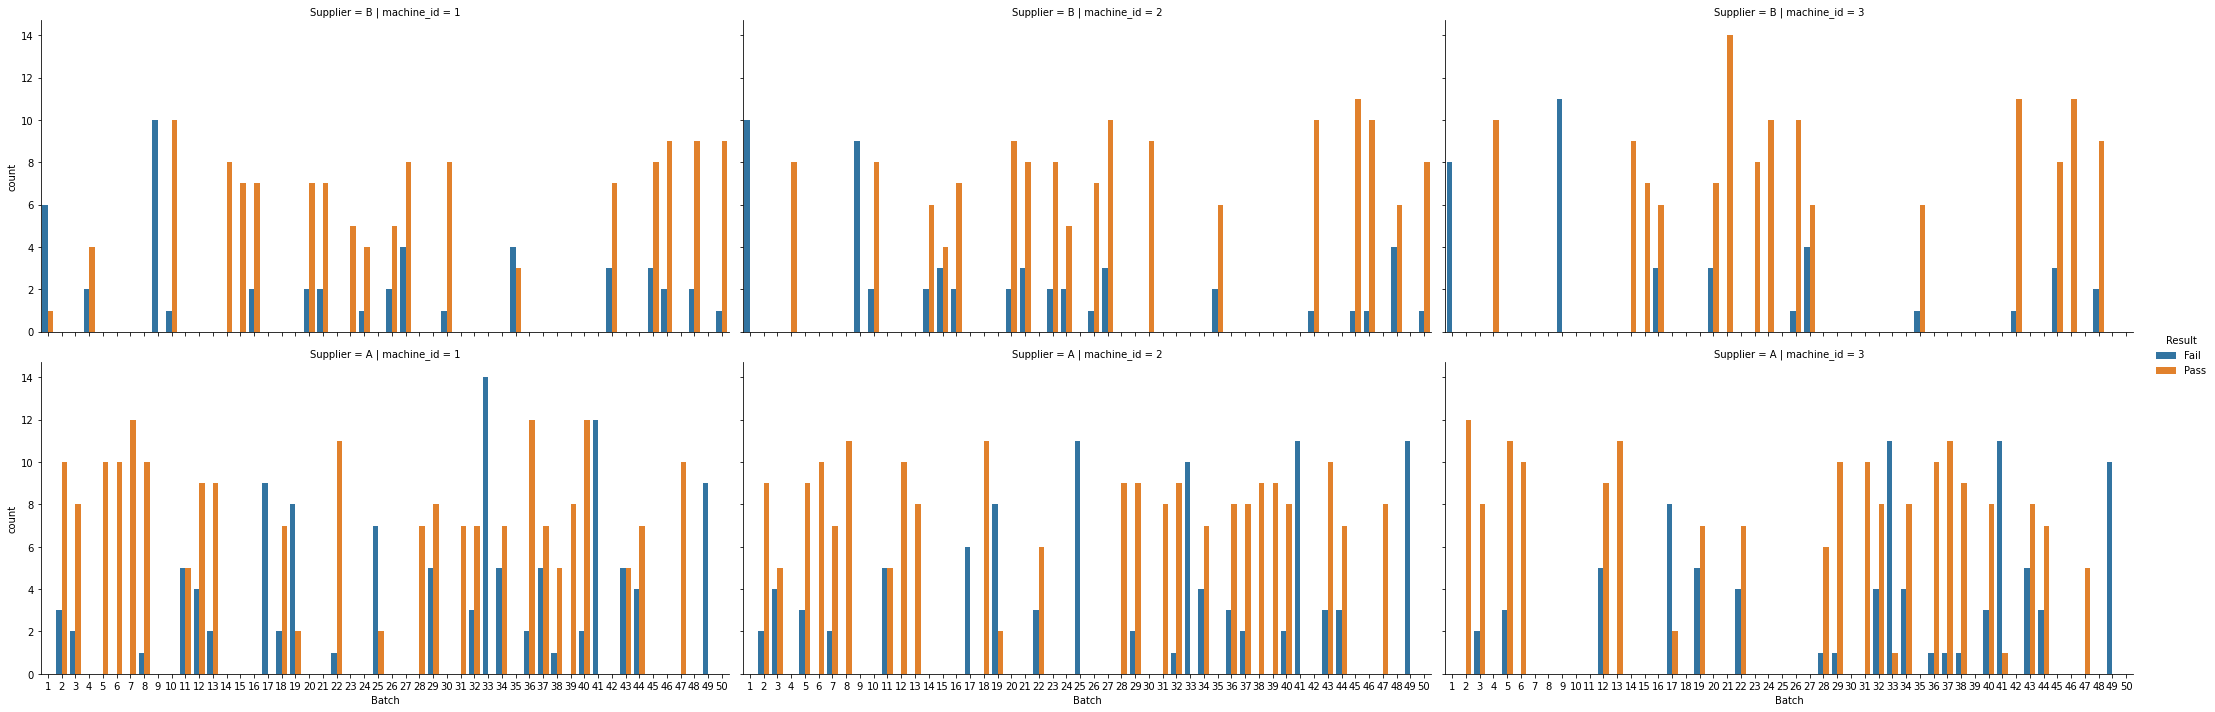

In [79]:
sns.catplot(data = dfb, x = 'Batch', hue='Result', row = 'Supplier',col='machine_id', kind ='count', aspect=2)

plt.show()

##### Calculate the fraction of times the cell phone case failed the test in each `Batch` per `machine_id`.

##### Fraction for machine - 1

In [80]:
m1_total = dfb.Batch[dfb.machine_id == 1].value_counts(sort =False).reset_index()

In [81]:
m1_total.rename(columns={"index": "Batch", "Batch": "Total"}, inplace=True)

In [82]:
m1_fail = dfb.Batch[(dfb.machine_id == 1) & (dfb.Result == 'Fail')].value_counts(sort = False).reset_index()

In [83]:
m1_fail.rename(columns={"index": "Batch", "Batch": "Fail"}, inplace=True)

In [84]:
m1_total = m1_total.merge(m1_fail,how='left', on='Batch', copy = True).reset_index()

In [85]:
m1_total.dropna(axis = 0, how = 'any', inplace=True)

In [86]:
m1_total['fraction'] = m1_total.Fail / m1_total.Total 

In [87]:
m1_total['Supplier'] = dfb.Supplier

In [88]:
m1_total.head()

,index,Batch,Total,Fail,fraction,Supplier
0,0,1,7,6.0,0.857143,B
1,1,2,13,3.0,0.230769,B
2,2,3,10,2.0,0.200000,B
3,3,4,6,2.0,0.333333,B
7,7,8,11,1.0,0.090909,A


##### Fraction for machine - 2

In [89]:
m2_total = dfb.Batch[dfb.machine_id == 2].value_counts(sort =False).reset_index()

In [90]:
m2_total.rename(columns={"index": "Batch", "Batch": "Total"}, inplace=True)

In [91]:
m2_fail = dfb.Batch[(dfb.machine_id == 2) & (dfb.Result == 'Fail')].value_counts(sort = False).reset_index()

In [92]:
m2_fail.rename(columns={"index": "Batch", "Batch": "Fail"}, inplace=True)

In [93]:
m2_total = m2_total.merge(m2_fail,how='left', on='Batch', copy = True).reset_index()

In [94]:
m2_total.dropna(axis = 0, how = 'any', inplace=True)

In [95]:
m2_total['fraction'] = m2_total.Fail / m2_total.Total 

In [96]:
m2_total['Supplier'] = dfb.Supplier

In [97]:
m2_total.head()

,index,Batch,Total,Fail,fraction,Supplier
0,0,1,10,10.0,1.000000,B
1,1,2,11,2.0,0.181818,B
2,2,3,9,4.0,0.444444,B
4,4,5,12,3.0,0.250000,B
6,6,7,9,2.0,0.222222,B


##### Fraction for machine - 3 

In [98]:
m3_total = dfb.Batch[dfb.machine_id == 3].value_counts(sort =False).reset_index()

In [99]:
m3_total.rename(columns={"index": "Batch", "Batch": "Total"}, inplace=True)

In [100]:
m3_fail = dfb.Batch[(dfb.machine_id == 3) & (dfb.Result == 'Fail')].value_counts(sort = False).reset_index()

In [101]:
m3_fail.rename(columns={"index": "Batch", "Batch": "Fail"}, inplace=True)

In [102]:
m3_total = m3_total.merge(m3_fail,how='left', on='Batch', copy = True).reset_index()

In [103]:
m3_total.dropna(axis = 0, how = 'any', inplace=True)

In [104]:
m3_total['Fraction'] = m3_total.Fail / m3_total.Total 

In [105]:
m3_total['Supplier'] = dfb.Supplier

In [106]:
m3_total.head()

,index,Batch,Total,Fail,Fraction,Supplier
0,0,1,8,8.0,1.000000,B
2,2,3,10,2.0,0.200000,B
4,4,5,14,3.0,0.214286,B
6,6,9,11,11.0,1.000000,B
7,7,12,14,5.0,0.357143,A


##### Visualize the fraction of times the cell phone case failed the test in each `Batch` per `machine_id` and for each unique value of `Supplier`.

For machine -1 

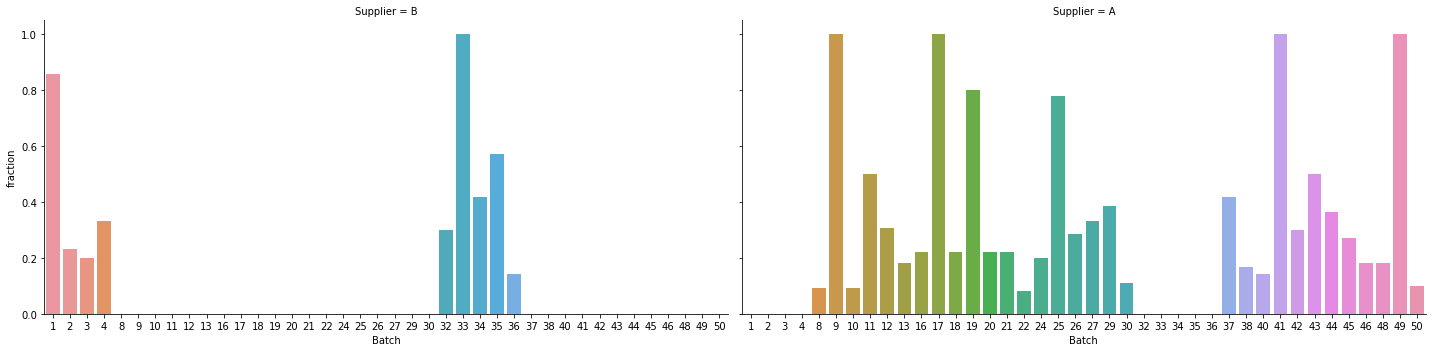

In [107]:
sns.catplot(data = m1_total, x = 'Batch', y='fraction', col = 'Supplier', kind ='bar', aspect=2)

plt.show()

For machine - 2

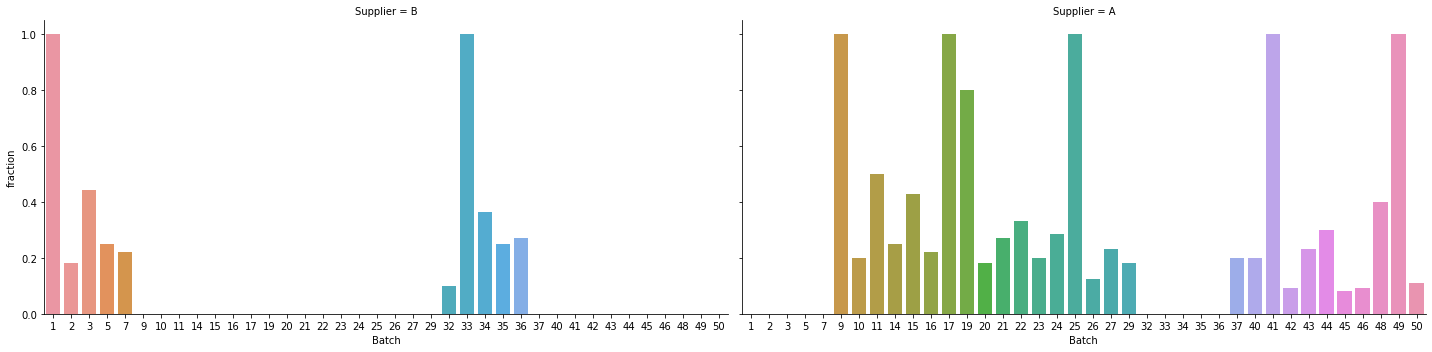

In [108]:
sns.catplot(data = m2_total, x = 'Batch', y='fraction', col = 'Supplier', kind ='bar', aspect=2)

plt.show()

For machine - 3

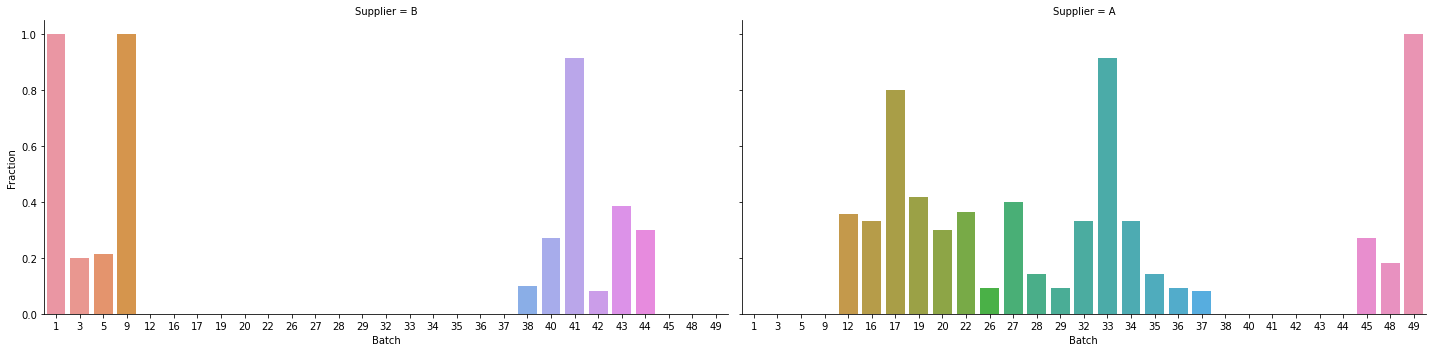

In [109]:
sns.catplot(data = m3_total, x = 'Batch', y='Fraction', col = 'Supplier', kind ='bar', aspect=2)

plt.show()

## Problem 05

You must apply KMeans clustering to the 4 operational variables `x1` through `x4`. You must decide how many clusters to use and describe how you made that choice. Include any figures that helped you make that choice.

Visualize your cluster analysis results by:
* Plotting the number of observations per cluster.
* Visualizing the relationships between the operational variables broken up by cluster.

You are interested in the fraction of cell phone cases that failed the drop test. Are any of the clusters associated with higher failure fractions than others? Based on your visualizations how would you describe that cluster?

In [110]:
dfb_clean = dfb.select_dtypes('float64').copy()

In [111]:
dfb_clean.shape

(1412, 5)

In [112]:
dfb_clean = dfb_clean.drop(columns = ['Density'])

In [113]:
dfb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1411
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1412 non-null   float64
 1   x2      1412 non-null   float64
 2   x3      1412 non-null   float64
 3   x4      1412 non-null   float64
dtypes: float64(4)
memory usage: 87.4 KB


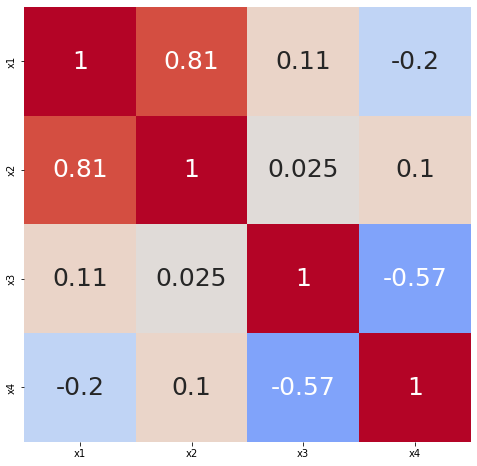

In [114]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(dfb_clean.corr(), 
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm', cbar=False,
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

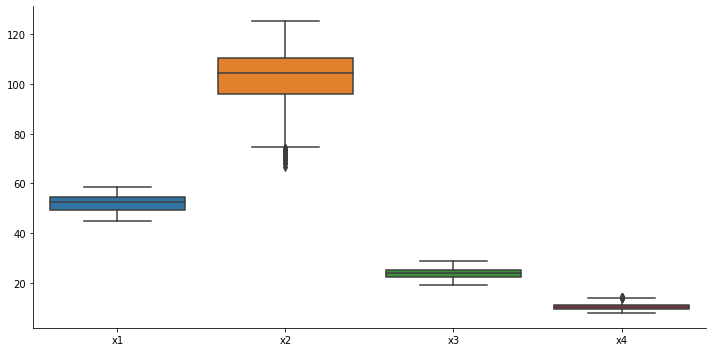

In [115]:
sns.catplot(data = dfb_clean, kind='box', aspect=2)

plt.show()

In [116]:
X = StandardScaler().fit_transform( dfb_clean )

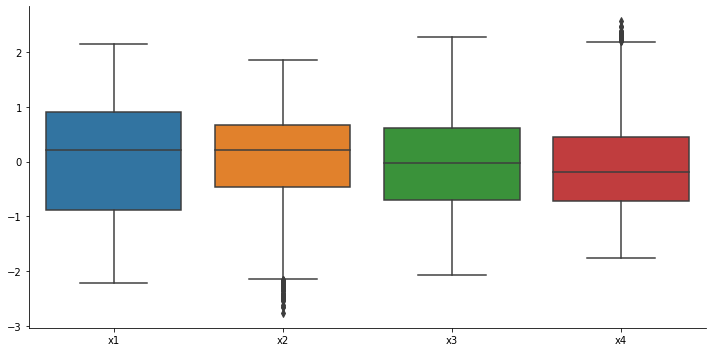

In [117]:
sns.catplot(data = pd.DataFrame(X, columns=dfb_clean.columns), kind='box', aspect=2)

plt.show()

In [118]:
tots_within = []

K = range(1, 26)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(X)
    tots_within.append(km.inertia_)

C:\Users\Vedant\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


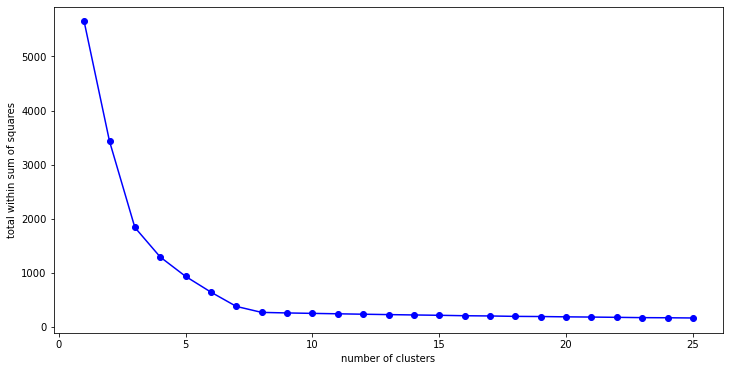

In [119]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

From the above figure we can see the bend is at 3 so we should take 3 clusters

In [120]:
clusters_3 = KMeans(n_clusters=3, random_state=121, n_init=25, max_iter=500).fit_predict( X )

In [121]:
dfb_clean['k3'] = pd.Series( clusters_3, index=dfb_clean.index )

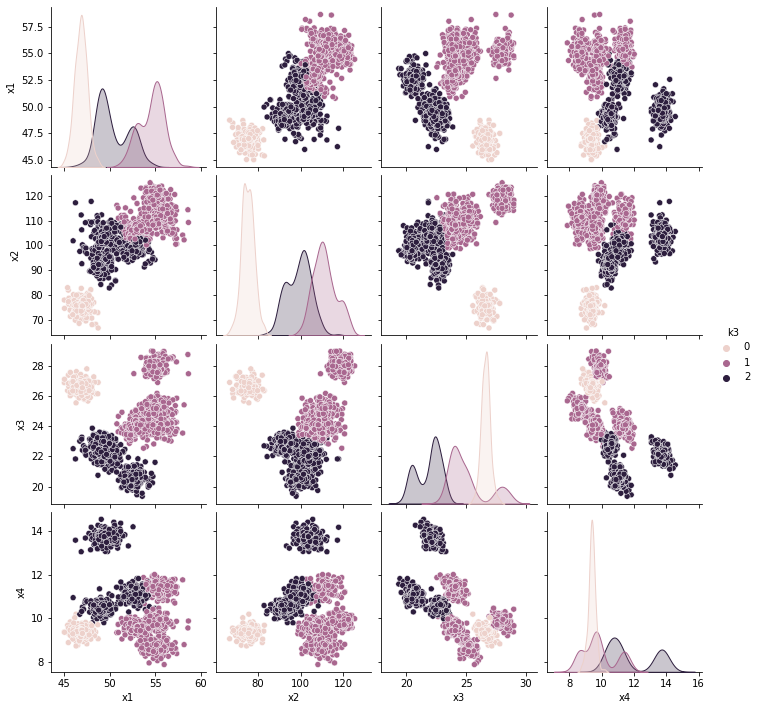

In [122]:
sns.pairplot(data = dfb_clean, hue='k3', diag_kws={'common_norm': False})

plt.show()

In [123]:
pca_pens = PCA(n_components=2).fit_transform( X )

In [124]:
pca_pens_df = pd.DataFrame( pca_pens, columns=['pc-01', 'pc-02'])

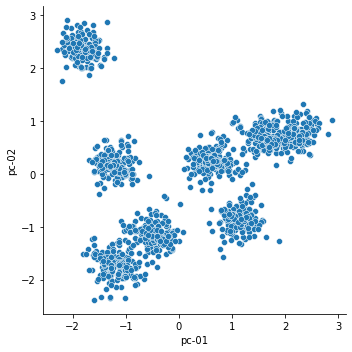

In [125]:
sns.relplot(data = pca_pens_df, x='pc-01', y='pc-02')

plt.show()

In [126]:
pca_pens_df['Result'] = dfb.Result

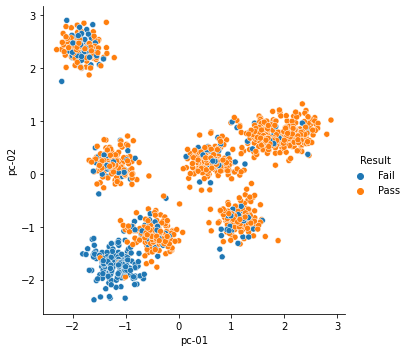

In [127]:
sns.relplot(data = pca_pens_df, x='pc-01', y='pc-02', hue='Result')

plt.show()